In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


In [2]:
data = pd.read_csv("stars.csv")

In [3]:
# Extraíndo os dados relevantes
color_index = data['bp_rp'].values  # Cor (x-eixo)
absolute_magnitude = data['g_abs'].values  # Magnitude absoluta (y-eixo)
data = np.column_stack((color_index, absolute_magnitude))

# Padronização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
data = []
for i in range(2,11):
    num_clusters = i
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    silhueta = silhouette_score(data_scaled, labels, sample_size=10000, random_state=42)
    data.append([i, silhueta])

In [5]:
resultado = pd.DataFrame(data, columns=['Clusters', 'Indice Silhueta'])
resultado

,Clusters,Indice Silhueta
0,2,0.573789
1,3,0.632997
2,4,0.531524
3,5,0.523701
4,6,0.501448
5,7,0.487944
6,8,0.476760
7,9,0.469304
8,10,0.456025


In [6]:
def plotar_grafico(labels, num_clusters):
    plt.figure(figsize=(10, 8))
    for cluster in range(num_clusters):
        plt.scatter(
            color_index[labels == cluster],
            absolute_magnitude[labels == cluster],
            label=f'Cluster {cluster + 1}',
            s=10,
            alpha=0.6
        )
    # plot do sol para referência
    plt.scatter(0.8, 4.6, c='yellow', s=30)
    
    # Centros
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x', label='Centro')
    
    # Melhoramentos no gráfico
    plt.gca().invert_yaxis()  # inverte o eixo y
    plt.xlabel('Cor (BP - RP)')
    plt.ylabel('Magnitude Absoluta(G)')
    plt.title(f'Diagrama Hertzsprung-Russell com K-Means Clustering. num_clusters: {num_clusters}')
    plt.legend()
    plt.grid(True)
    plt.show()

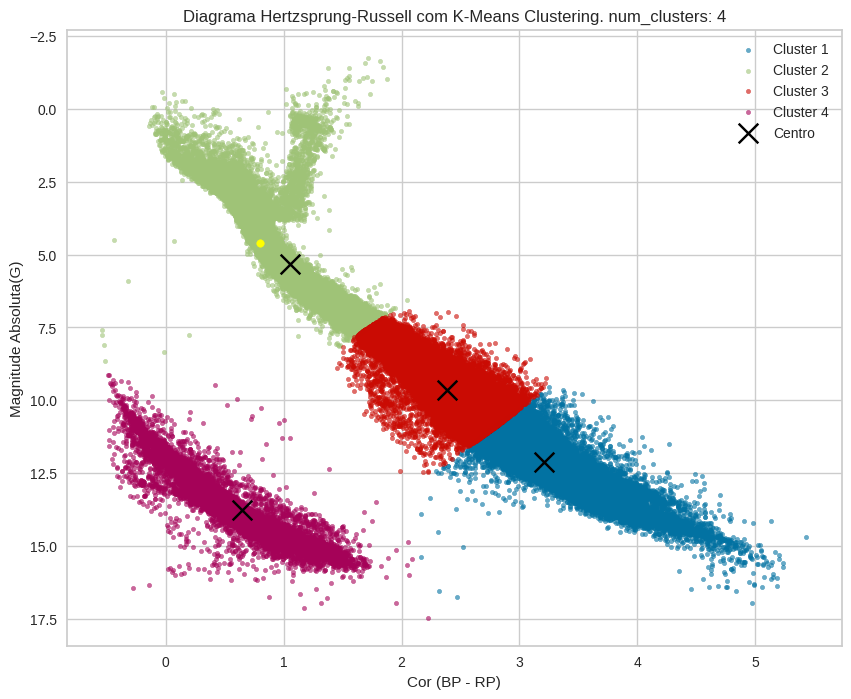

In [7]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_scaled)
plotar_grafico(labels, num_clusters)

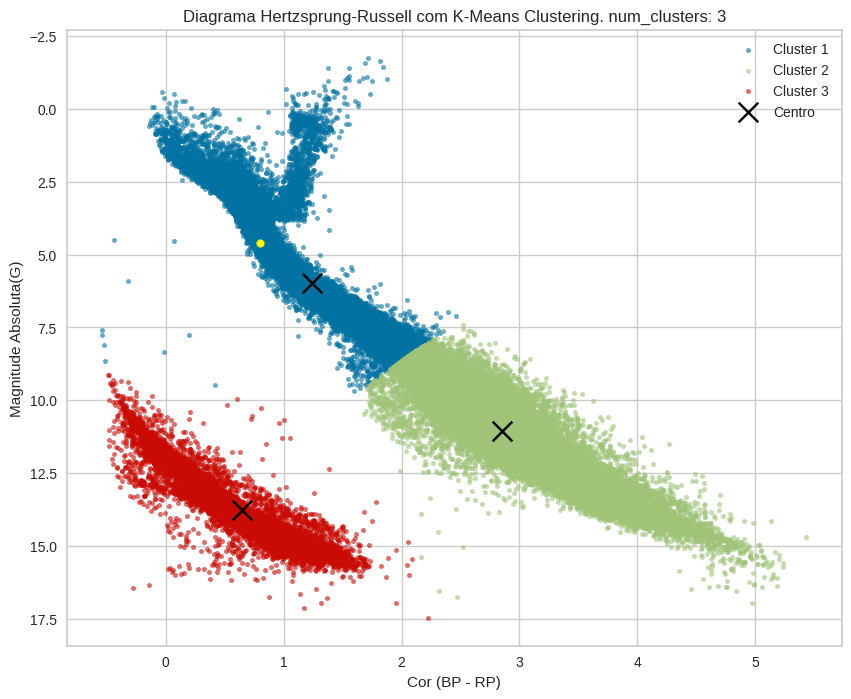

In [8]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_scaled)
plotar_grafico(labels, num_clusters)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=29, random_state=42),
                 k=(3, 30), timings=False)

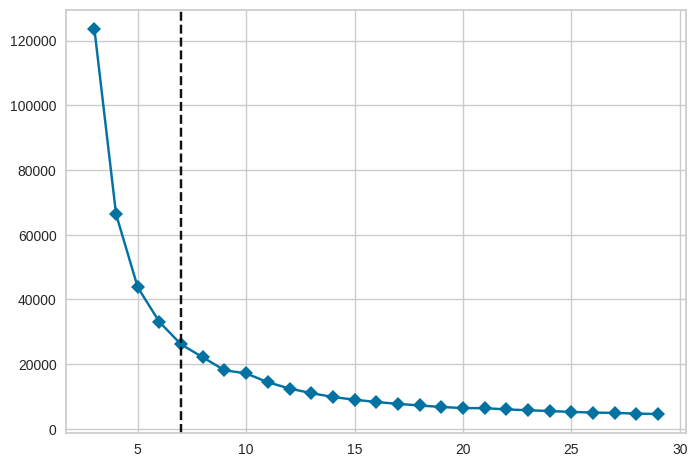

In [9]:
# Métod do cotovelo

random_state = 42
visualizer = KElbowVisualizer(
    KMeans(random_state=42), k=(3, 30), timings=False
)

visualizer.fit(data_scaled)

In [10]:
n_clusters = visualizer.elbow_value_
print("Melhor número de clusters de acordo com o método:", n_clusters)

Melhor número de clusters de acordo com o método: 7


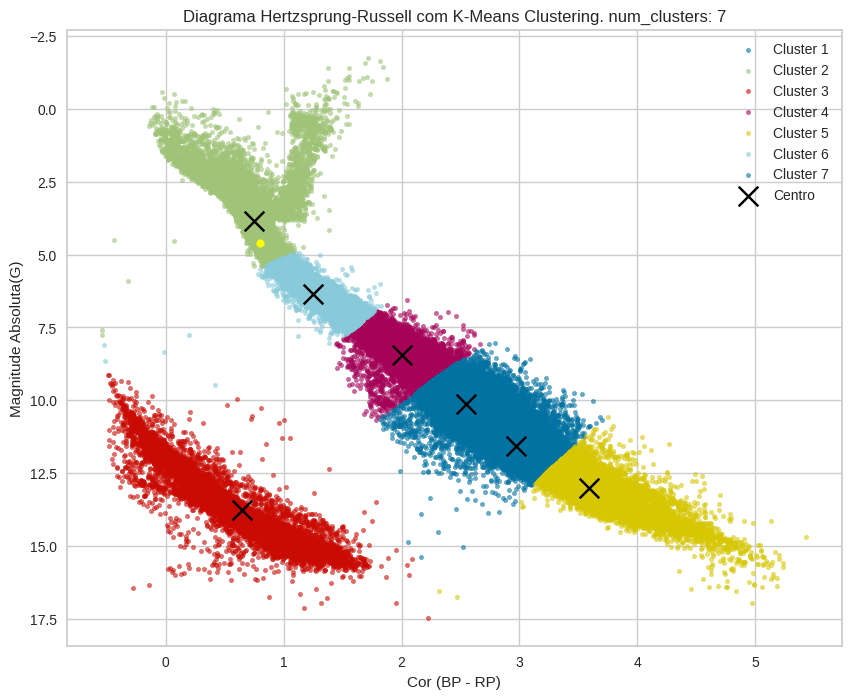

In [11]:
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_scaled)
plotar_grafico(labels, num_clusters)